# Heatwave Diagnostics Package (HDP) Live Demo

## What are heatwave metrics?
Heatwave metrics are designed to answer questions at scale that temperature analysis cannot. Consider the two temperature scenarios below:

(LENS1 001 ALL-Forcing, lat=30.63, lon=262.5, two different summers)   

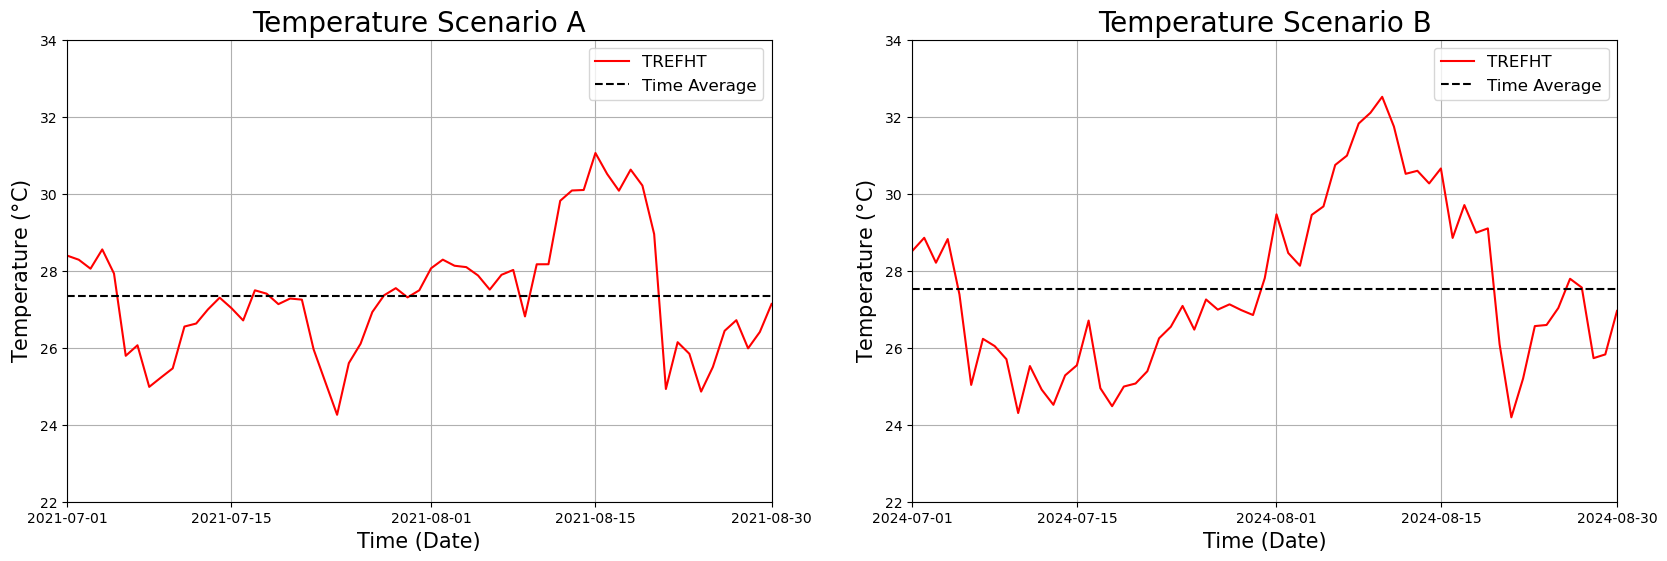

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cftime
import xarray


path1 = "/projects/dgs/persad_research/SIMULATION_DATA/ZARR/LENS1/SIM_VARIABLES/all_day_TREFHTMN.zarr"
path2 = "/projects/dgs/persad_research/SIMULATION_DATA/ZARR/LENS1/SIM_VARIABLES/all_day_TREFHTMX.zarr"
ds1 = xarray.open_zarr(path1)["TREFHTMN"].sel(member="001").sel(lat=30.26, lon=360-97.74, method='nearest')
ds2 = xarray.open_zarr(path2)["TREFHTMX"].sel(member="001").sel(lat=30.26, lon=360-97.74, method='nearest')

ds = (ds1 + ds2) / 2

start_a = cftime.DatetimeNoLeap(2021, 7, 1, 0, 0, 0, 0, has_year_zero=True)
end_a = cftime.DatetimeNoLeap(2021, 8, 30, 0, 0, 0, 0, has_year_zero=True)

start_b = cftime.DatetimeNoLeap(2024, 7, 1, 0, 0, 0, 0, has_year_zero=True)
end_b = cftime.DatetimeNoLeap(2024, 8, 30, 0, 0, 0, 0, has_year_zero=True)

scenario_a = (ds - 273.15).sel(time=slice(start_a, end_a))
scenario_b = (ds - 273.15).sel(time=slice(start_b, end_b))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), facecolor='w')

scenario_a.plot(ax=ax1, color="Red", label="TREFHT")
scenario_b.plot(ax=ax2, color="Red", label="TREFHT")

ax1.plot([start_a, end_a], [scenario_a.mean(), scenario_a.mean()], color="Black", label="Time Average", linestyle="--")
ax2.plot([start_b, end_b], [scenario_b.mean(), scenario_b.mean()], color="Black", label="Time Average", linestyle="--")

ax1.set_title("Temperature Scenario A", fontsize=20)
ax2.set_title("Temperature Scenario B", fontsize=20)

ax1.set_ylabel("Temperature ($\\degree$C)", fontsize=15)
ax2.set_ylabel("Temperature ($\\degree$C)", fontsize=15)

ax1.set_xlabel("Time (Date)", fontsize=15)
ax2.set_xlabel("Time (Date)", fontsize=15)

ax1.set_ylim(22, 34)
ax2.set_ylim(22, 34)

ax1.set_xticks(
    [
        cftime.DatetimeNoLeap(2021, 7, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2021, 7, 15, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2021, 8, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2021, 8, 15, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2021, 8, 30, 0, 0, 0, 0, has_year_zero=True)
    ]
)

ax2.set_xticks(
    [
        cftime.DatetimeNoLeap(2024, 7, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2024, 7, 15, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2024, 8, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2024, 8, 15, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2024, 8, 30, 0, 0, 0, 0, has_year_zero=True)
    ]
)

ax1.set_xlim(start_a, end_a)
ax2.set_xlim(start_b, end_b)

ax1.grid()
ax2.grid()

ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
f.show()

The mean state for these two summers is the same, but the temporal structures are very different. We can easily compare the heatwave patterns between the two summers by hand, but what about the other summers? Probably not, and this is just for one grid cell:

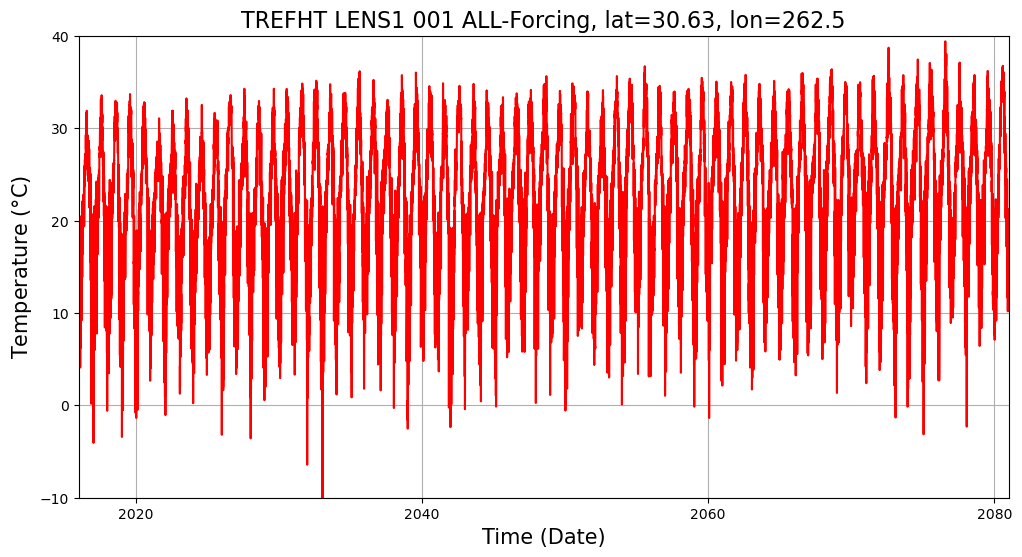

In [5]:
f, ax = plt.subplots(1, 1, figsize=(12, 6), facecolor='w')

(ds - 273.15).plot(ax=ax, color="Red")
ax.set_xlim(cftime.DatetimeNoLeap(2015, 12, 31, 0, 0, 0, 0, has_year_zero=True), cftime.DatetimeNoLeap(2080, 12, 31, 0, 0, 0, 0, has_year_zero=True))

ax.set_title("TREFHT LENS1 001 ALL-Forcing, lat=30.63, lon=262.5", fontsize=16)
ax.set_ylabel("Temperature ($\\degree$C)", fontsize=15)
ax.set_xlabel("Time (Date)", fontsize=15)
ax.set_ylim(-10, 40)
ax.grid()

## Can we develop a system for automatically identifying heatwaves? Answer: yes!

First, we will use an **extreme heat threshold** for determining days of extreme heat. In the figure below, the red dots indicate hot days above that threshold:

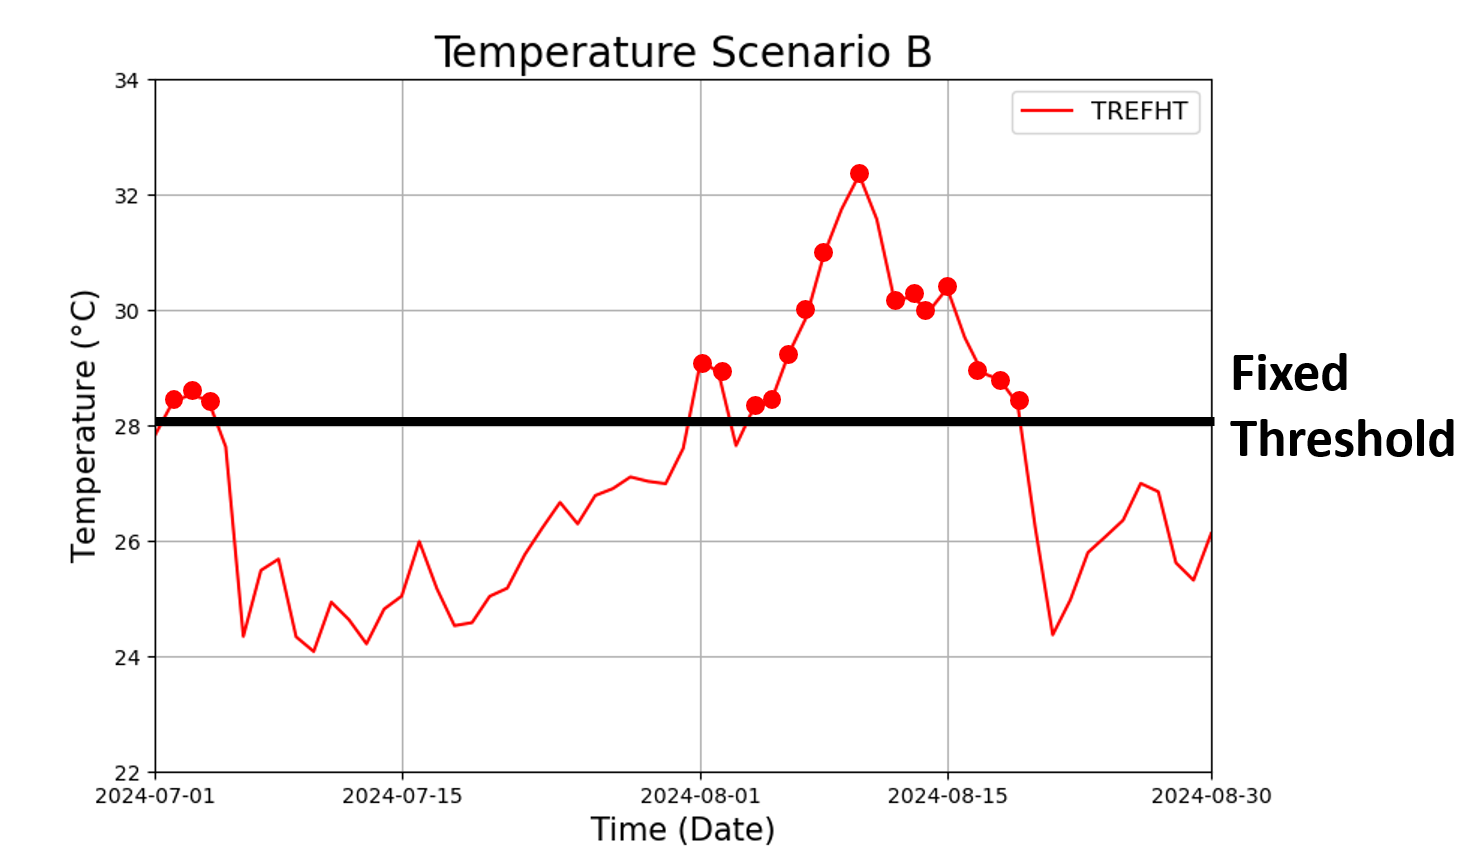

A fixed or constant threshold may be useful for physical effects, such as material deformation, but is less useful for capturing physiological and environmental effects. Let's consider a seasonally variable threshold:

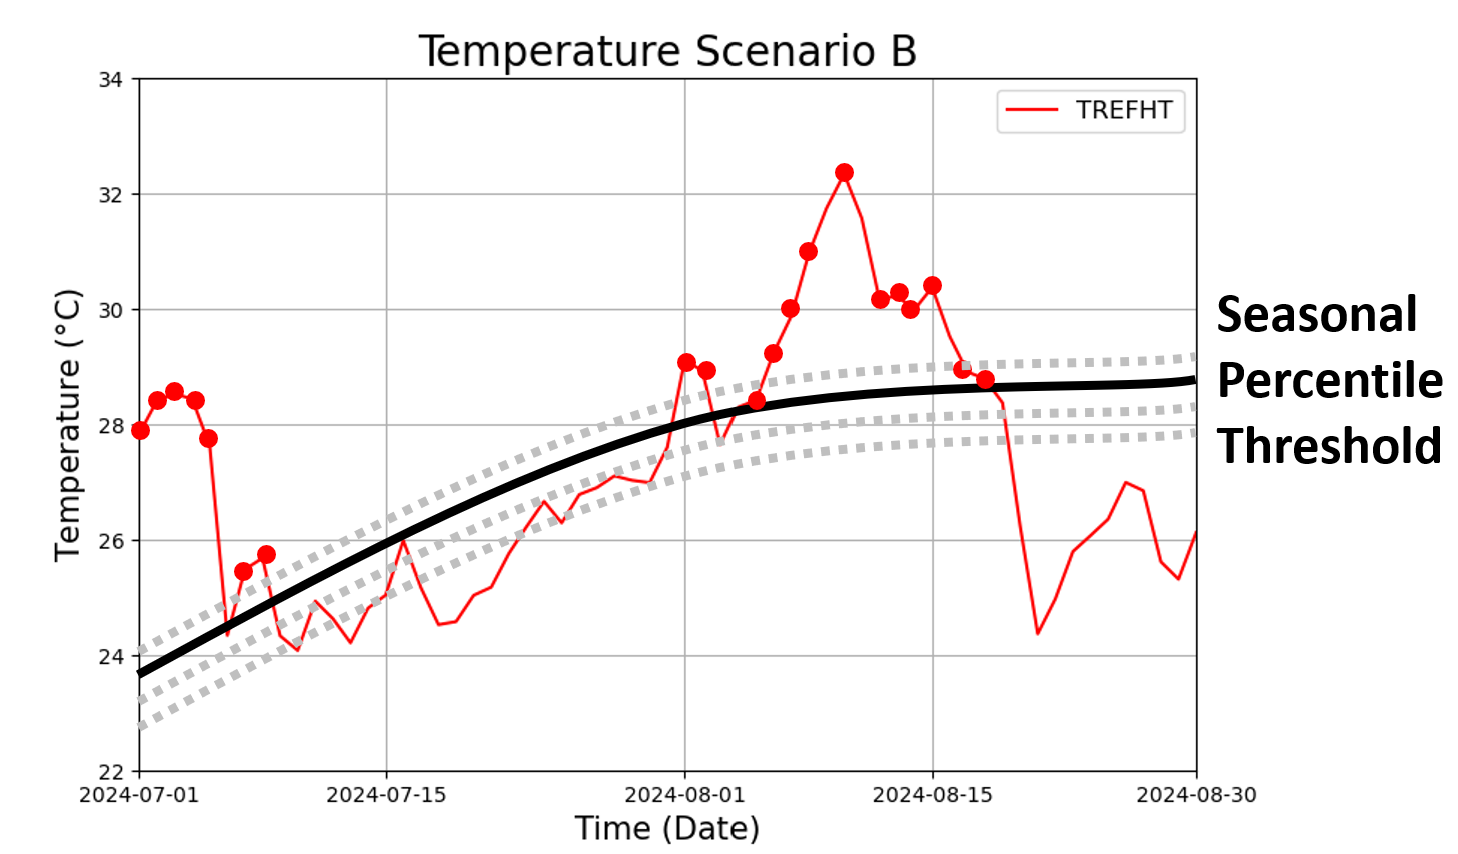

A seasonal threshold is typically generated by measuring the some percentile of day-of-year temperatures from a baseline dataset such as a preindustrial control or historical simulation. For example, the ETCCDI uses 90th percentile temperatures from 1961-1990.

The hot days identified by the threshold may or may not constitute a heatwave. Now we can start to identify heatwaves using a **heatwave definition**. The yellow dots in the figure below identify heatwave days alongside labels identifying each distinct heatwave.

## We can sum the number of heatwave days to obtain a **heatwave metric** known as *heatwave frequency (HWF)*.

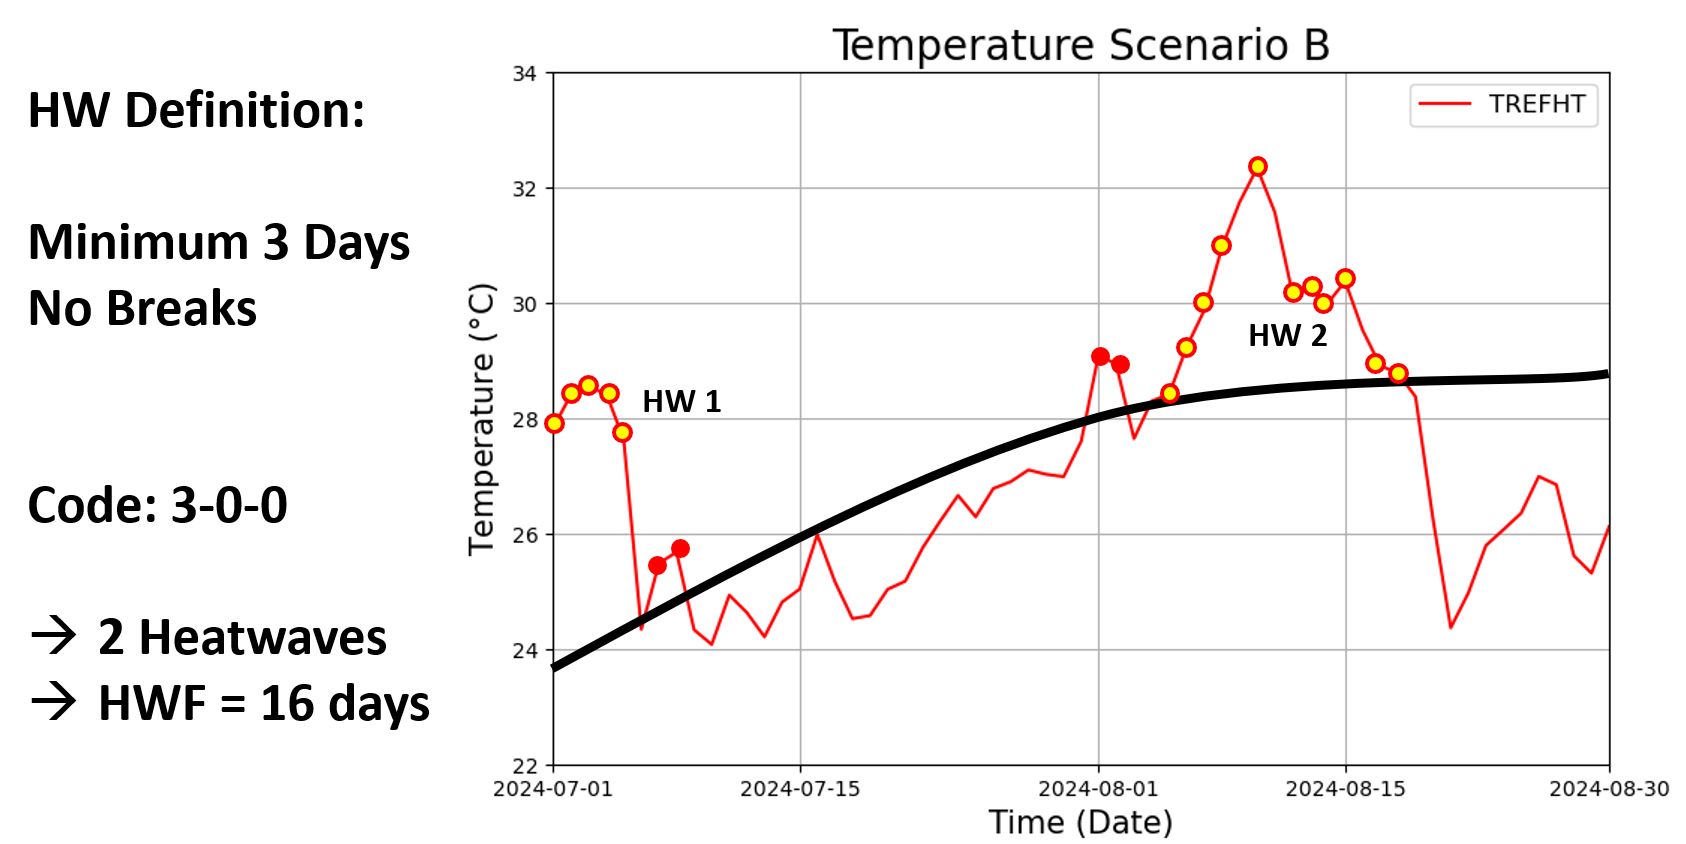

We can modify the heatwave definition to filter for different "flavors" of heatwave. Notice how changing the definition influences which days constitute a heatwave, how many heatwaves are detected, and the value of HWF:

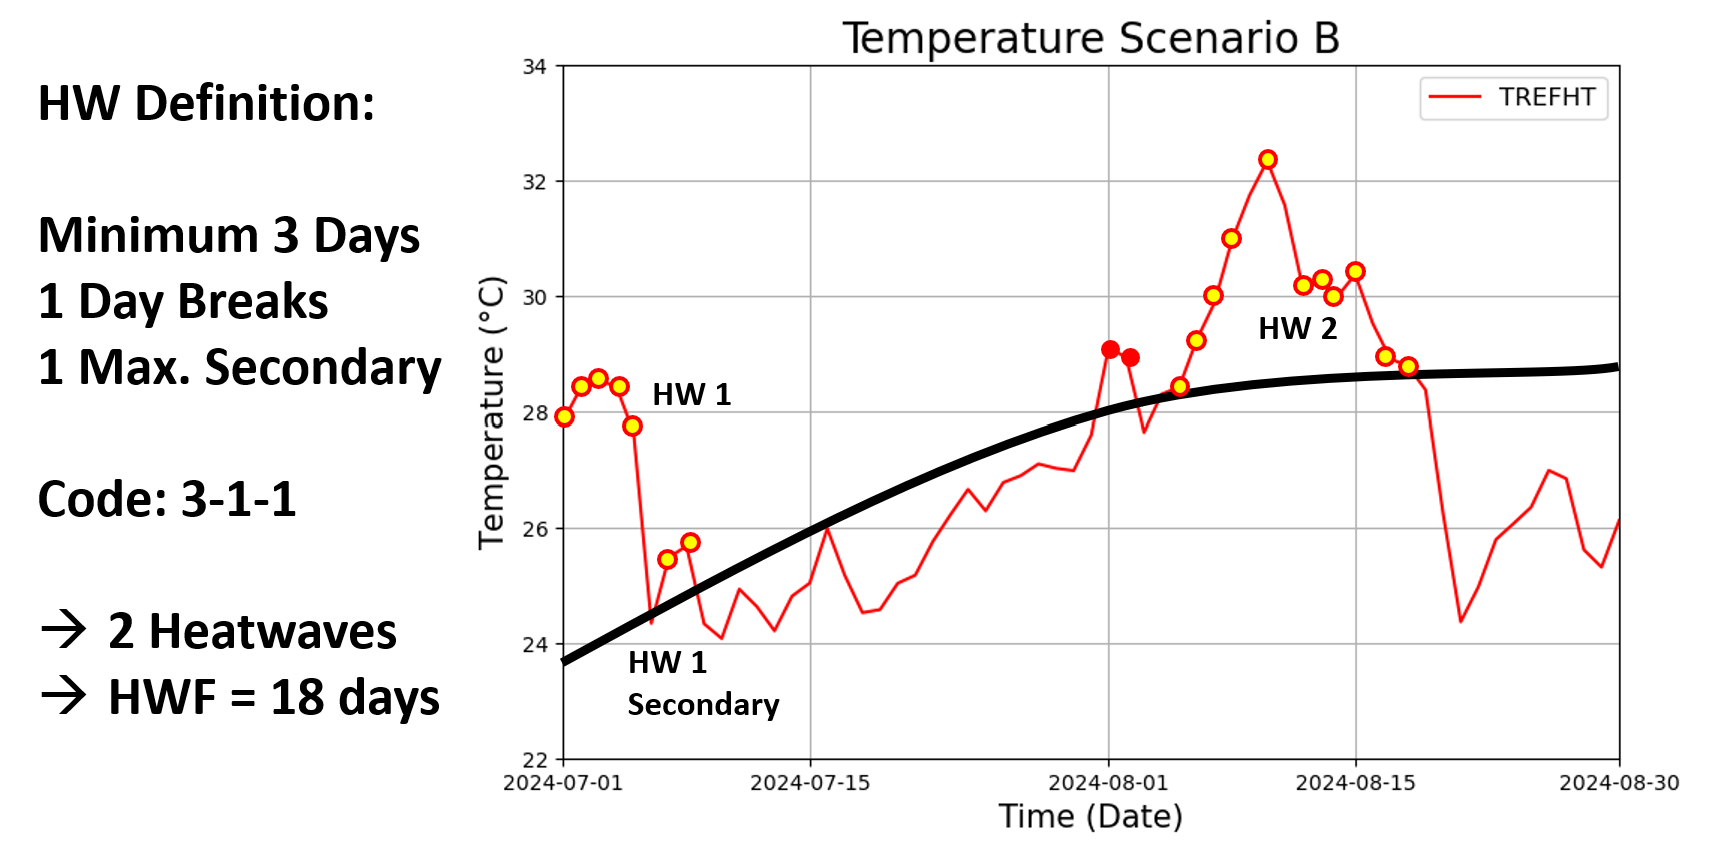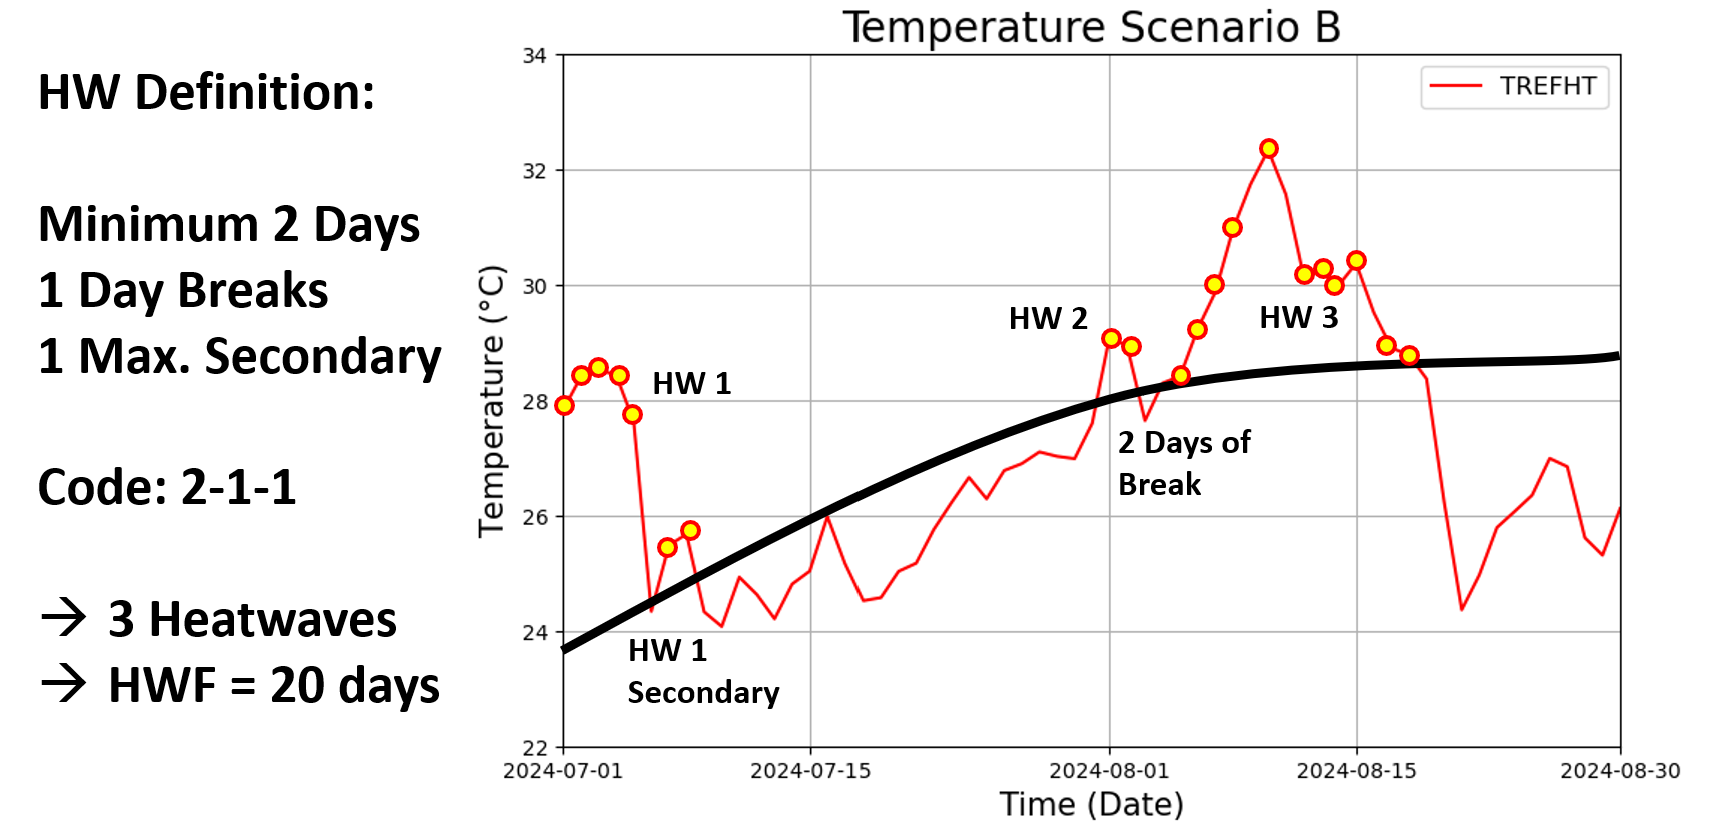

## The Heatwave Parameter Space
This system takes in several inputs and choices to produce the heatwave metrics. We can generalize these inputs and choices to describe the "heatwave parameter space":

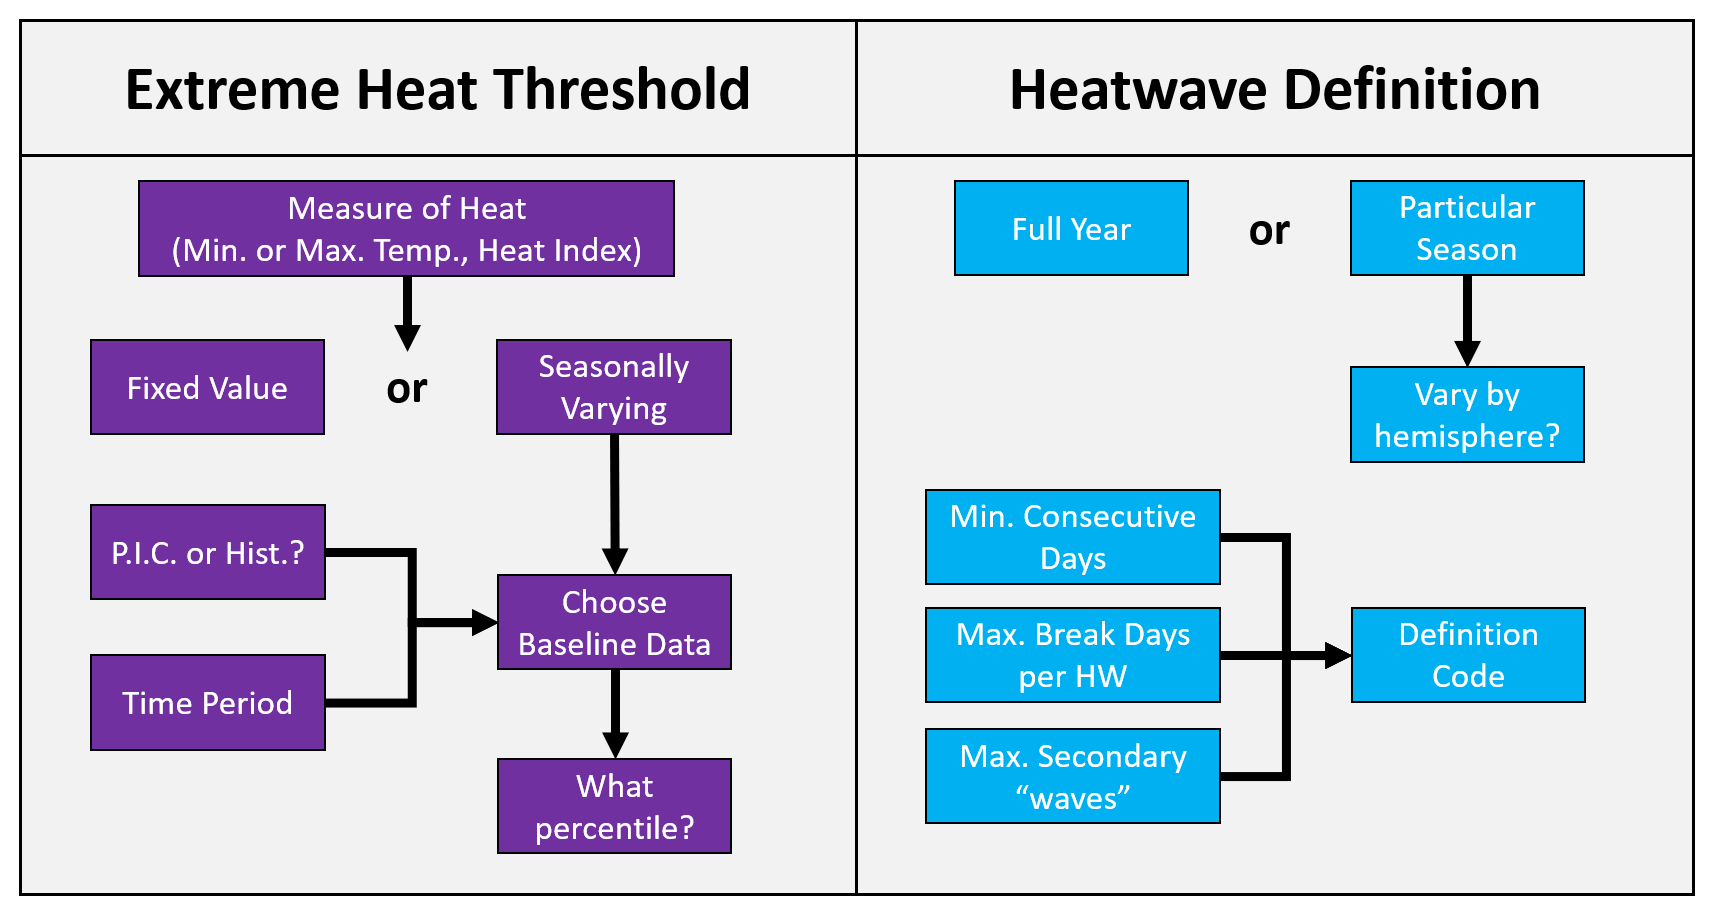

## What is the HDP and what problem does it solve?

All of these parameters makes systematically quantifying heatwave metrics a non-trivial task, particularly when working with large ensembles of global climate model data. If we streamline this process and develop software that is computationally fast enough, we can efficicently sample large samples of this parameter space to better understand how heatwave patterns evolve in the climate system. The HDP therefore adheres to the [FAIR](https://www.nature.com/articles/s41597-022-01710-x) software principles:

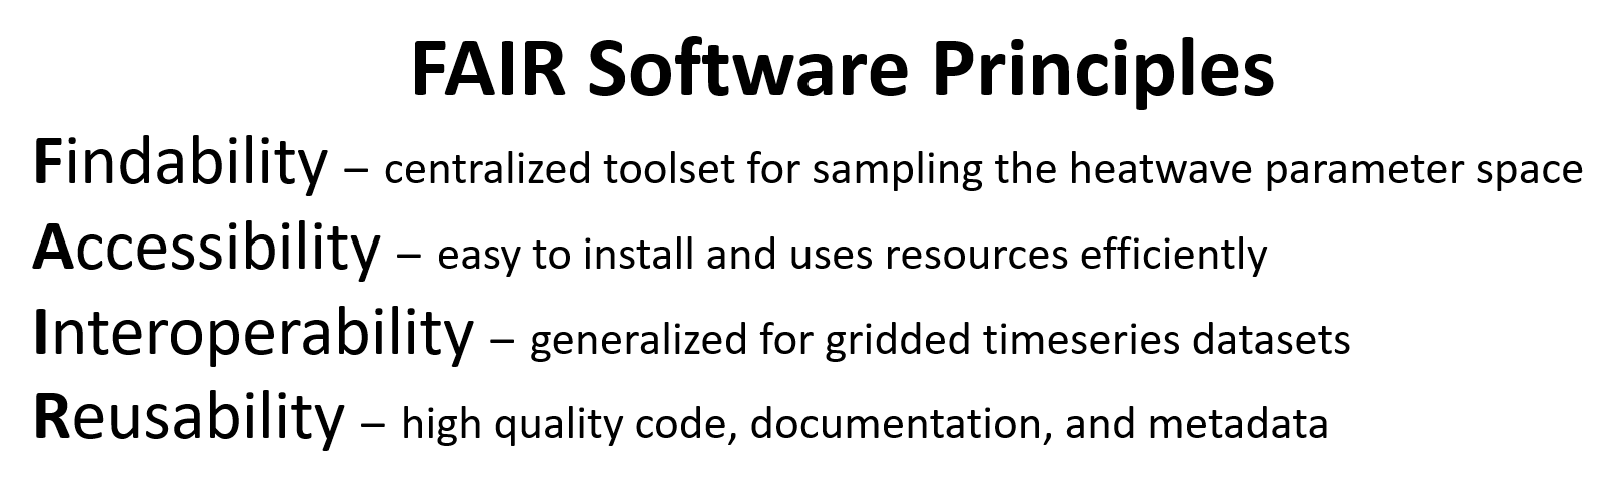

## Live Demonstration

First, we import the packages we need:

In [ ]:
import xarray
import matplotlib.pyplot as plt
from dask.distributed import Client, LocalCluster
import src.hdp as hdp
import numpy as np
import cftime
import cartopy.crs as ccrs

Spin up a dask cluster to take advantage of parallel and distributed computing.

In [ ]:
cluster = LocalCluster(
    dashboard_address=":8004",
    memory_limit="50GB",
    threads_per_worker=2,
    processes=True
)
client = Client(cluster)
cluster.scale(20)
client

Load our pre-industrial control dataset, selecting a smaller time range for the sake of time.

In [ ]:
lens1_PIC_ensemble_trefhtmn_path = "/projects/dgs/persad_research/SIMULATION_DATA/ZARR/LENS1/SIM_VARIABLES/preindustrial_day_TREFHTMN.zarr"
lens1_PIC_ensemble_trefhtmn = xarray.open_zarr(lens1_PIC_ensemble_trefhtmn_path)["TREFHTMN"]

start_time = cftime.DatetimeNoLeap(1800, 1, 1, 0, 0, 0, 0, has_year_zero=True)
end_time = cftime.DatetimeNoLeap(1849, 12, 31, 0, 0, 0, 0, has_year_zero=True)
lens1_PIC_ensemble_trefhtmn = lens1_PIC_ensemble_trefhtmn.sel(time=slice(start_time, end_time))

Then call the HDP to compute a seasonally-varying threshold for a range of percentiles.

In [ ]:
pic_threshold_ds = hdp.compute_threshold(lens1_PIC_ensemble_trefhtmn, percentiles=np.array([0.9, 0.95, 0.99]))
pic_threshold_ds

In [ ]:
%%time
pic_threshold_ds = pic_threshold_ds.compute()

To confirm our threshold, let's plot the global mean for a percentile:

In [ ]:
pic_threshold_ds["threshold"].weighted(np.cos(np.deg2rad(pic_threshold_ds.lat))).mean(dim=["lat", "lon"]).sel(percentile=0.9, method="nearest").plot()

Now let's load the dataset we are interested in calculating heatwave metrics for. LENS1, ALL-forcing, we will select one ensemble member for the sake of time, but it is entirely possible to select more and add as many additional dimensions to the xarray dataset.

In [ ]:
lens1_ALL_ensemble_trefhtmn_path = "/projects/dgs/persad_research/SIMULATION_DATA/ZARR/LENS1/SIM_VARIABLES/all_day_TREFHTMN.zarr"
lens1_ALL_ensemble_trefhtmn = xarray.open_zarr(lens1_ALL_ensemble_trefhtmn_path)["TREFHTMN"].sel(member='001')

start_time = cftime.DatetimeNoLeap(2015, 1, 1, 0, 0, 0, 0, has_year_zero=True)
end_time = cftime.DatetimeNoLeap(2090, 12, 31, 0, 0, 0, 0, has_year_zero=True)

lens1_ALL_ensemble_trefhtmn = lens1_ALL_ensemble_trefhtmn.sel(time=slice(start_time, end_time))

We then call the HDP again to build our metric dataset, supplying our definitions. Note that it will only compute heatwave metrics for the warm seasons for bot hemispheres separately by default. In a future update, this will be easily configured. 

In [ ]:
definitions = [
    [3, 0, 0],
    [3, 1, 1],
    [4, 0, 0],
    [4, 1, 1]
]

hw_metrics = hdp.sample_heatwave_metrics(lens1_ALL_ensemble_trefhtmn, pic_threshold_ds["threshold"], definitions)
hw_metrics

In [ ]:
%%time
hw_metrics = hw_metrics.compute()

We can then explore the results by applying various reductions and plotting. Automatic figure generation is not fully implemented in the HDP, but is planned for the 1.0 release as an integral feature of the package. For now, we can manually generate plots from the dataset:

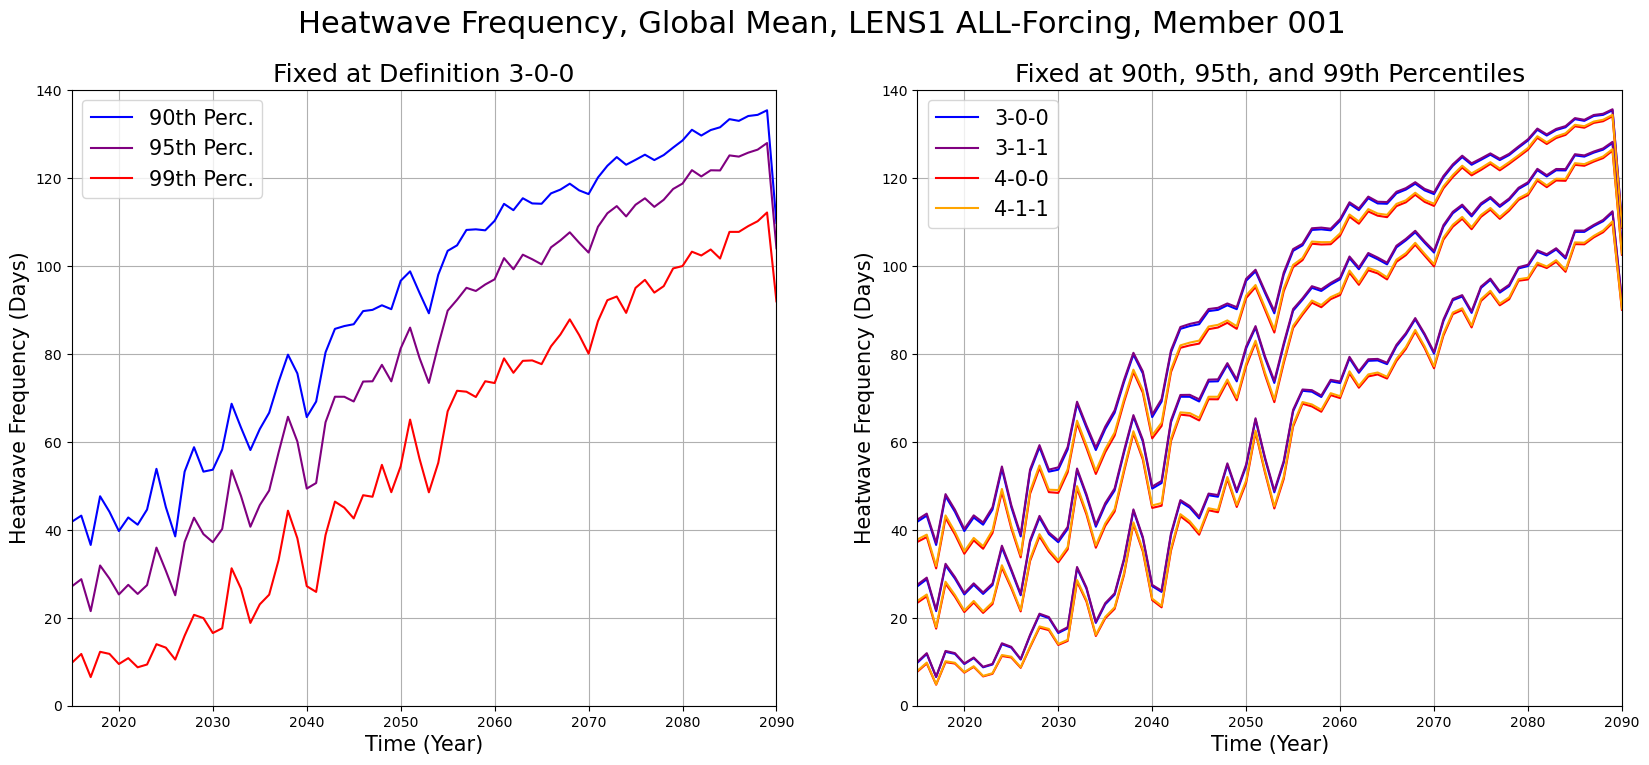

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), facecolor='w')

hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="3-0-0").sel(percentile=0.9, method="nearest").plot(ax=ax1, color="Blue", label="90th Perc.")
hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="3-0-0").sel(percentile=0.95, method="nearest").plot(ax=ax1, color="Purple", label="95th Perc.")
hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="3-0-0").sel(percentile=0.99, method="nearest").plot(ax=ax1, color="Red", label="99th Perc.")

hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="3-0-0").sel(percentile=0.9, method="nearest").plot(ax=ax2, color="Blue", label="3-0-0")
hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="3-1-1").sel(percentile=0.9, method="nearest").plot(ax=ax2, color="Purple", label="3-1-1")
hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="4-0-0").sel(percentile=0.9, method="nearest").plot(ax=ax2, color="Red", label="4-0-0")
hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="4-1-1").sel(percentile=0.9, method="nearest").plot(ax=ax2, color="Orange", label="4-1-1")

hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="3-0-0").sel(percentile=0.95, method="nearest").plot(ax=ax2, color="Blue",)
hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="3-1-1").sel(percentile=0.95, method="nearest").plot(ax=ax2, color="Purple")
hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="4-0-0").sel(percentile=0.95, method="nearest").plot(ax=ax2, color="Red")
hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="4-1-1").sel(percentile=0.95, method="nearest").plot(ax=ax2, color="Orange")


hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="3-0-0").sel(percentile=0.99, method="nearest").plot(ax=ax2, color="Blue")
hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="3-1-1").sel(percentile=0.99, method="nearest").plot(ax=ax2, color="Purple")
hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="4-0-0").sel(percentile=0.99, method="nearest").plot(ax=ax2, color="Red")
hw_metrics["HWF"].weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon"]).sel(definition="4-1-1").sel(percentile=0.99, method="nearest").plot(ax=ax2, color="Orange")

ax1.set_xlim(2015, 2090)
ax1.set_ylim(0, 140)
ax1.grid()
ax1.legend(fontsize=15)
ax1.set_xlabel("Time (Year)", fontsize=15)
ax1.set_ylabel("Heatwave Frequency (Days)", fontsize=15)
ax1.set_title("Fixed at Definition 3-0-0", fontsize=18)

ax2.set_xlim(2015, 2090)
ax2.set_ylim(0, 140)
ax2.grid()
ax2.legend(fontsize=15)
ax2.set_xlabel("Time (Year)", fontsize=15)
ax2.set_ylabel("Heatwave Frequency (Days)", fontsize=15)
ax2.set_title("Fixed at 90th, 95th, and 99th Percentiles", fontsize=18)

f.suptitle("Heatwave Frequency, Global Mean, LENS1 ALL-Forcing, Member 001", fontsize=22)
f.show()

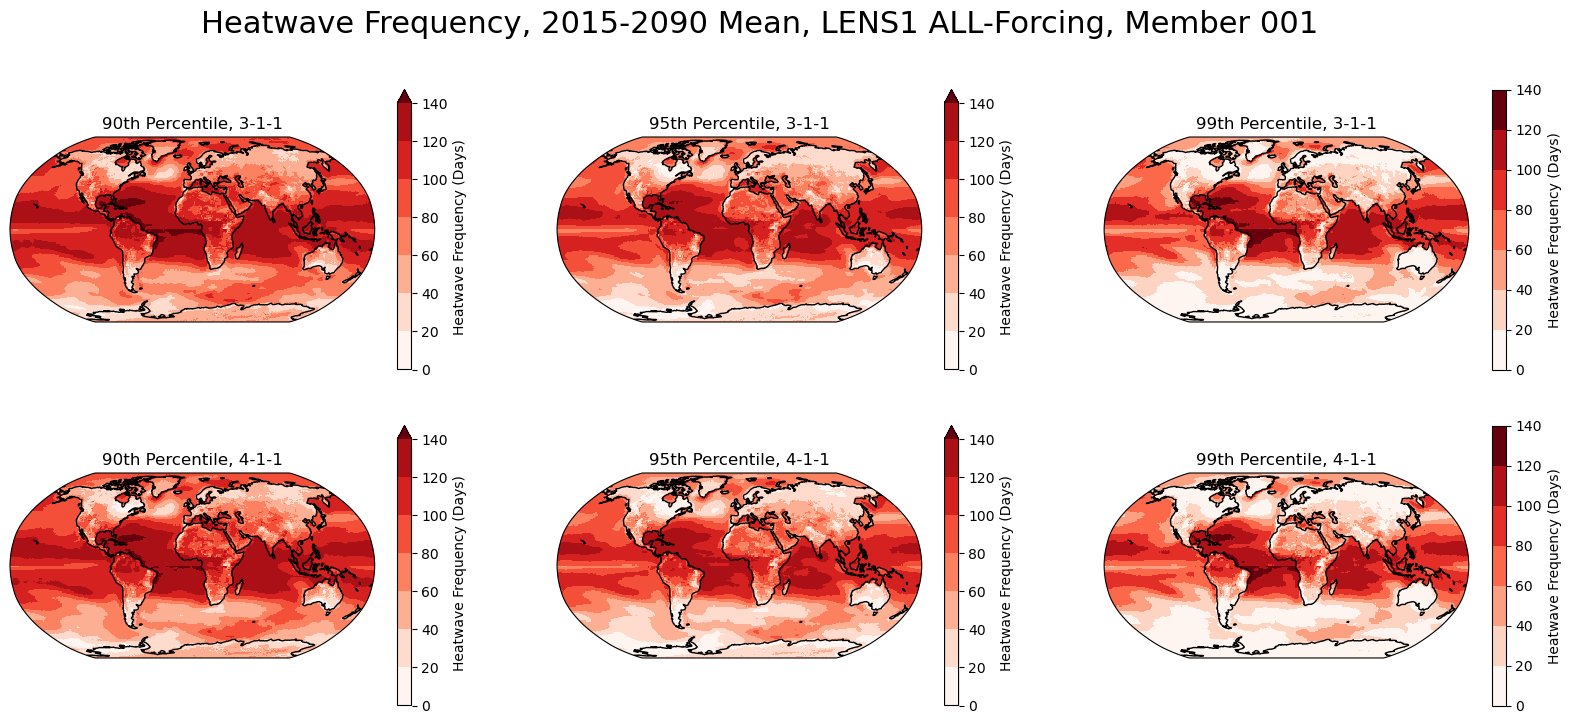

In [12]:
proj = ccrs.Robinson()
f, axes = plt.subplots(2, 3, figsize=(20, 8), facecolor='w', subplot_kw=dict(projection=proj))

cmap = "Reds"
transform = ccrs.PlateCarree()
levels = np.arange(0, 141, 20)

hw_metrics["HWF"].rename("Heatwave Frequency (Days)").sel(percentile=0.9, method="nearest").sel(definition="3-1-1").mean(dim="year").plot(ax=axes[0, 0], cmap=cmap, transform=transform, levels=levels)
hw_metrics["HWF"].rename("Heatwave Frequency (Days)").sel(percentile=0.9, method="nearest").sel(definition="4-1-1").mean(dim="year").plot(ax=axes[1, 0], cmap=cmap, transform=transform, levels=levels)
hw_metrics["HWF"].rename("Heatwave Frequency (Days)").sel(percentile=0.95, method="nearest").sel(definition="3-1-1").mean(dim="year").plot(ax=axes[0, 1], cmap=cmap, transform=transform, levels=levels)
hw_metrics["HWF"].rename("Heatwave Frequency (Days)").sel(percentile=0.95, method="nearest").sel(definition="4-1-1").mean(dim="year").plot(ax=axes[1, 1], cmap=cmap, transform=transform, levels=levels)
hw_metrics["HWF"].rename("Heatwave Frequency (Days)").sel(percentile=0.99, method="nearest").sel(definition="3-1-1").mean(dim="year").plot(ax=axes[0, 2], cmap=cmap, transform=transform, levels=levels)
hw_metrics["HWF"].rename("Heatwave Frequency (Days)").sel(percentile=0.99, method="nearest").sel(definition="4-1-1").mean(dim="year").plot(ax=axes[1, 2], cmap=cmap, transform=transform, levels=levels)

fz = 12
axes[0, 0].set_title("90th Percentile, 3-1-1", fontsize=fz)
axes[1, 0].set_title("90th Percentile, 4-1-1", fontsize=fz)
axes[0, 1].set_title("95th Percentile, 3-1-1", fontsize=fz)
axes[1, 1].set_title("95th Percentile, 4-1-1", fontsize=fz)
axes[0, 2].set_title("99th Percentile, 3-1-1", fontsize=fz)
axes[1, 2].set_title("99th Percentile, 4-1-1", fontsize=fz)

for ax in axes.flatten():
    ax.coastlines()

f.suptitle("Heatwave Frequency, 2015-2090 Mean, LENS1 ALL-Forcing, Member 001", fontsize=22)
f.show()

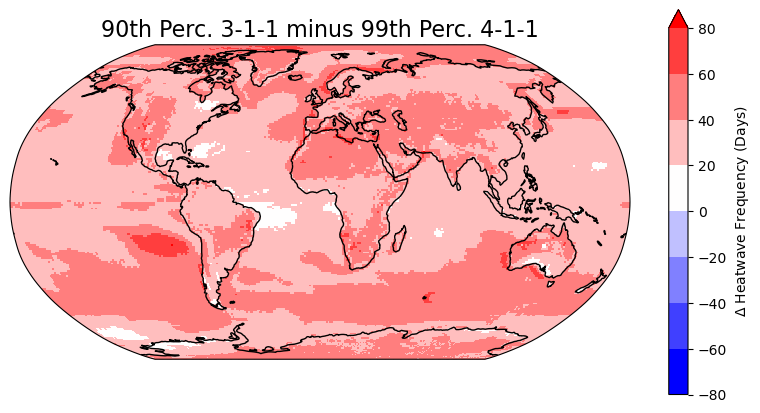

In [13]:
ds1 = hw_metrics["HWF"].sel(percentile=0.9, method="nearest").sel(definition="3-1-1").mean(dim="year")
ds2 = hw_metrics["HWF"].sel(percentile=0.99, method="nearest").sel(definition="4-1-1").mean(dim="year")
diff = (ds1 - ds2).rename("$\\Delta$ Heatwave Frequency (Days)")

proj = ccrs.Robinson()
f, ax1 = plt.subplots(1, 1, figsize=(10, 5), facecolor='w', subplot_kw=dict(projection=proj))

transform = ccrs.PlateCarree()
levels = np.arange(-80, 81, 20)

cmap="Reds"
transform = ccrs.PlateCarree()
diff.plot(ax=ax1, cmap="bwr", vmax=70, vmin=-70, transform=transform, levels=levels)
ax1.coastlines()
ax1.set_title("90th Perc. 3-1-1 minus 99th Perc. 4-1-1", fontsize=16)
f.show()

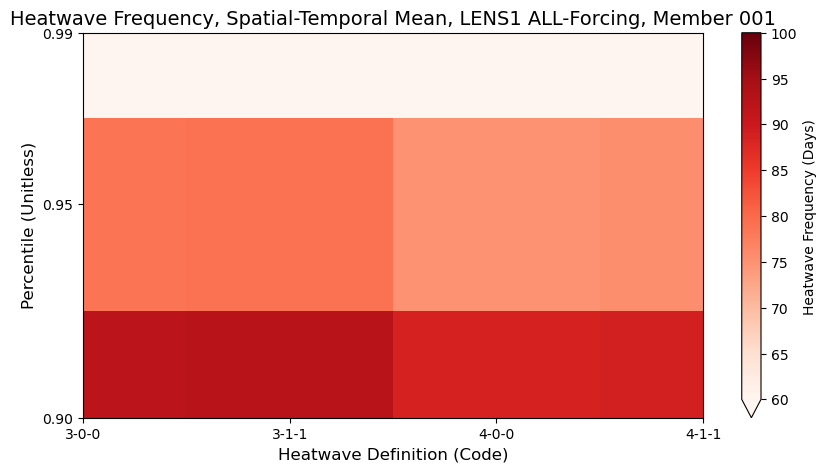

In [18]:
f, ax1 = plt.subplots(1, 1, figsize=(10, 5), facecolor='w')


hw_metrics["HWF"].rename("Heatwave Frequency (Days)").weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon", "year"]).plot(cmap="Reds", vmin=60, vmax=100)

ax1.set_yticks([0.9, 0.95, 0.99])
ax1.set_ylabel("Percentile (Unitless)", fontsize=12)
ax1.set_xlabel("Heatwave Definition (Code)", fontsize=12)
ax1.set_title("Heatwave Frequency, Spatial-Temporal Mean, LENS1 ALL-Forcing, Member 001", fontsize=14)
f.show()

Outside of this demo, I ran this same analysis but for a large range in about 20 minutes on the same dask cluster:

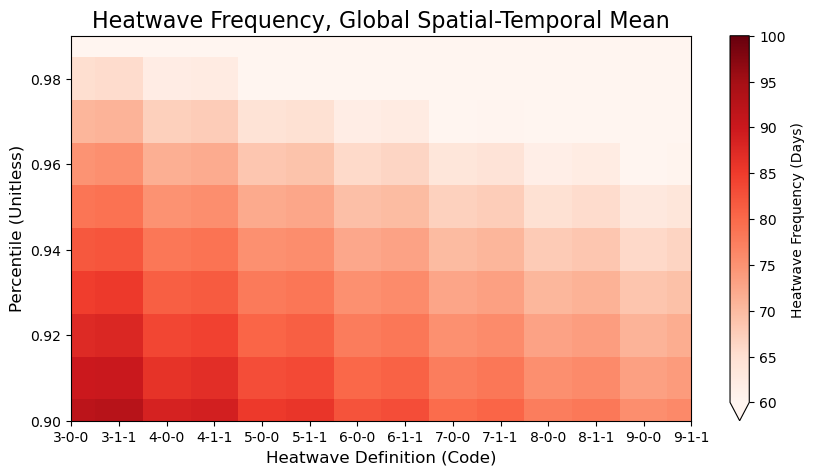

In [22]:
hr_ds = xarray.open_zarr("/local1/hw_metrics_large_param_space.zarr")

f, ax1 = plt.subplots(1, 1, figsize=(10, 5), facecolor='w')


hr_ds["HWF"].rename("Heatwave Frequency (Days)").weighted(np.cos(np.deg2rad(hw_metrics.lat))).mean(dim=["lat", "lon", "year"]).plot(cmap="Reds", vmin=60, vmax=100)

ax1.set_ylabel("Percentile (Unitless)", fontsize=12)
ax1.set_xlabel("Heatwave Definition (Code)", fontsize=12)
ax1.set_title("Heatwave Frequency, Global Spatial-Temporal Mean", fontsize=16)
f.show()

## Other Figures Produce by the HDP

These figures are from Cummins et al. 2024 (Pending Submission):

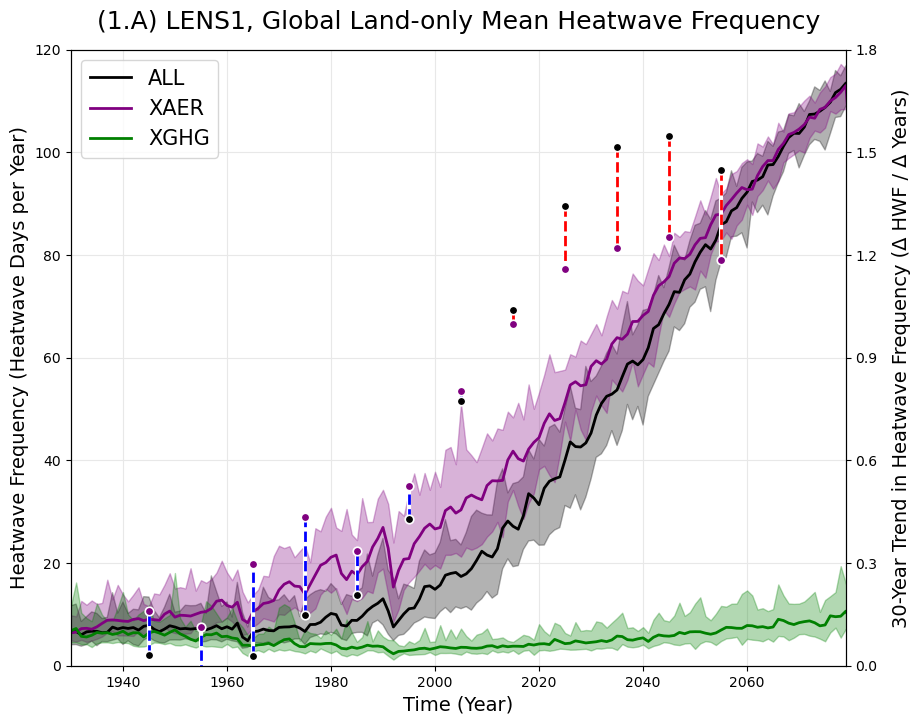
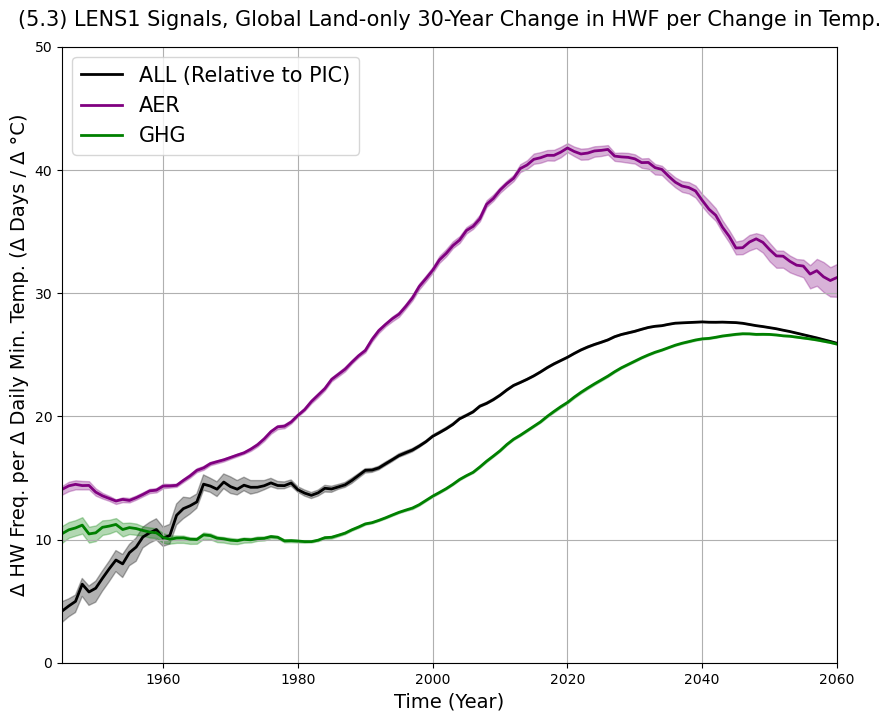
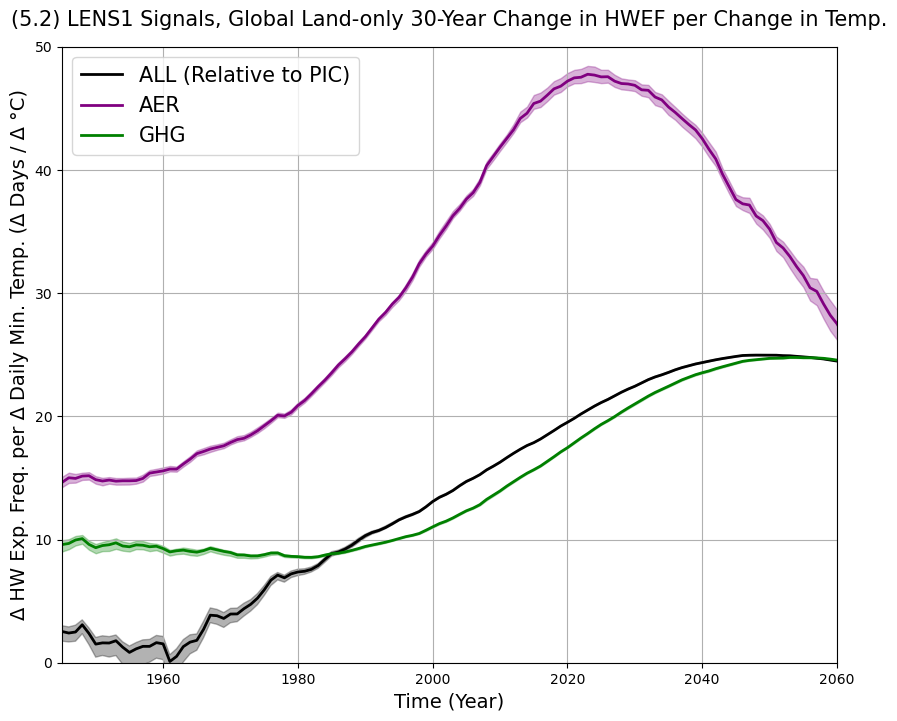
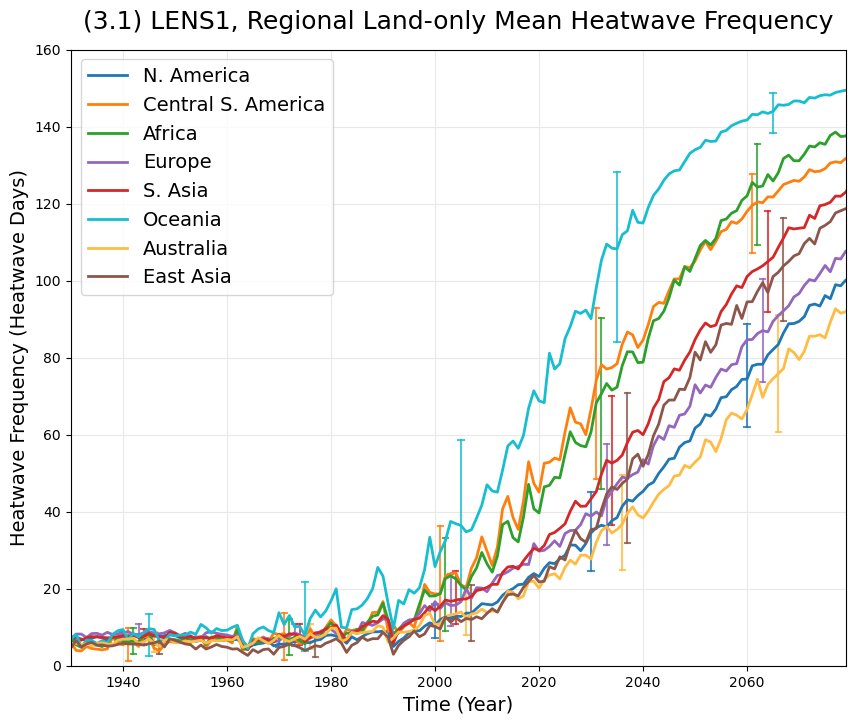
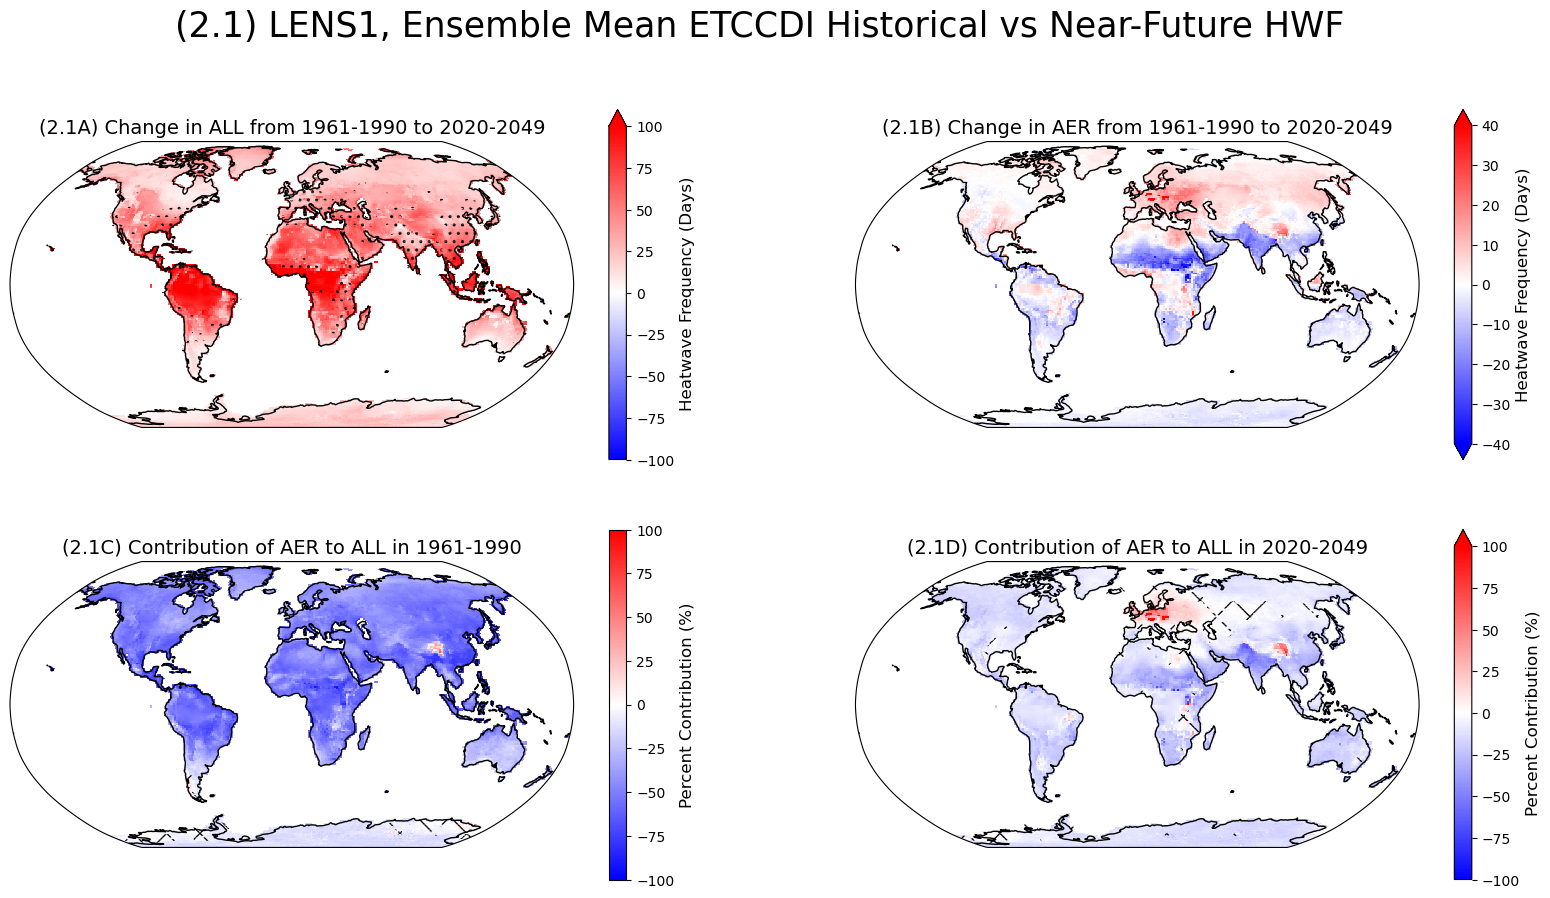

## Acknowledgements
These acknowledgements indicate the contributions made by various individuals and their roles in developing the HDP:

>Cameron Cummins<br>
Computational Engineer<br>
Contact: cameron.cummins@utexas.edu<br>
Webpage: [https://www.jsg.utexas.edu/student/cameron_cummins](https://www.jsg.utexas.edu/student/cameron_cummins)<br>
Affiliation: Persad Aero-Climate Lab, The University of Texas at Austin

>Dr. Geeta Persad<br>
Advisor<br>
Contact: geeta.persad@jsg.utexas.edu<br>
Webpage: [https://www.ggpersad.com/](https://www.ggpersad.com/)<br>
Affiliation: Persad Aero-Climate Lab, The University of Texas at Austin


>Dr. Jane Baldwin<br>
Heatwave Specialist<br>
Contact: jane.baldwin@uci.edu<br>
Webpage: [https://www.janebaldw.in/](https://www.janebaldw.in/)<br>
Affiliation: Climate and Extreme Event Risk Group, University of California, Irvine


>Dr. Danielle Touma<br>
Heatwave Specialist<br>
Contact: danielle.touma@utexas.edu<br>
Webpage: [https://www.jsg.utexas.edu/researcher/danielle_touma/](https://www.jsg.utexas.edu/researcher/danielle_touma/)<br>
Affiliation: Institute for Geophysics, The University of Texas at Austin
    